<b>

<p>
<center>
<font size="5">
Stock Market Visualization
</font>
</center>
</p>

In [105]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Pre-Processing

In [106]:
### Loading the csv files
fundamentals=pd.read_csv('fundamentals.csv')
split_adj_price=pd.read_csv('prices-split-adjusted.csv')
sec=pd.read_csv('securities.csv')

In [107]:
# Pre processing-adding new columns to understand the data better
sec = sec.rename(columns = {'Ticker symbol' : 'symbol','GICS Sector' : 'sector','GICS Sub Industry':'sub_sector'})
fundamentals = fundamentals.rename(columns = {'Ticker Symbol' : 'symbol'})
adj_price  = split_adj_price.merge(sec[['symbol','sector','sub_sector','Security']], on = 'symbol')
adj_price['date'] = pd.to_datetime(adj_price['date'])
adj_price.insert(4, 'per_chg',((adj_price.close)-(adj_price.open))/adj_price.open*100) ## calculates percentage change between open and close prices of a stock
adj_price.insert(1, 'year',pd.DatetimeIndex(adj_price['date']).year.astype(np.int64)) ## extracts year from date
adj_price.insert(2, 'month',pd.DatetimeIndex(adj_price['date']).month.astype(np.int64)) ## extracts month from date 
adj_price.insert(3, 'day',pd.DatetimeIndex(adj_price['date']).day.astype(np.int64)) ## extracts day from date 
adj_price.insert(7,'change',(np.where(adj_price['per_chg']>0, 'positive','negative')))


In [108]:
## Extracting year,month, day from date
fundamentals.drop(columns='Unnamed: 0',axis=1,inplace=True)
#adj_price.drop(columns='date',axis=1,inplace=True)
fundamentals.insert(1, 'prd_end_year',pd.DatetimeIndex(fundamentals['Period Ending']).year.astype(np.int64)) ## extracts year from date
fundamentals.insert(2, 'prd_end_month',pd.DatetimeIndex(fundamentals['Period Ending']).month.astype(np.int64)) ## extracts month from date 
fundamentals.insert(3, 'prd_end_day',pd.DatetimeIndex(fundamentals['Period Ending']).day.astype(np.int64)) ## extracts day from date 
fundamentals.drop(columns='Period Ending',axis=1,inplace=True)
adj_price=adj_price.round(2)
adj_price.head()



,date,year,month,day,symbol,open,close,change,per_chg,low,high,volume,sector,sub_sector,Security
0,2016-01-05,2016,1,5,WLTW,123.43,125.84,positive,1.95,122.31,126.25,2163600.00,Financials,Insurance Brokers,Willis Towers Watson
1,2016-01-06,2016,1,6,WLTW,125.24,119.98,negative,-4.20,119.94,125.54,2386400.00,Financials,Insurance Brokers,Willis Towers Watson
2,2016-01-07,2016,1,7,WLTW,116.38,114.95,negative,-1.23,114.93,119.74,2489500.00,Financials,Insurance Brokers,Willis Towers Watson
3,2016-01-08,2016,1,8,WLTW,115.48,116.62,positive,0.99,113.50,117.44,2006300.00,Financials,Insurance Brokers,Willis Towers Watson
4,2016-01-11,2016,1,11,WLTW,117.01,114.97,negative,-1.74,114.09,117.33,1408600.00,Financials,Insurance Brokers,Willis Towers Watson


In [109]:
### Dropping Nan/null values
import warnings
warnings.filterwarnings('ignore')
fundamentals['For Year'].dropna(inplace=True)
fundamentals['year+1'] = fundamentals['For Year'] + 1
fundamentals['year+1'][fundamentals['year+1'].values==1215.0] = 2015

In [110]:
fundamentals = fundamentals[~fundamentals['year+1'].isna()]
fundamentals['year+1'] = fundamentals['year+1'].astype(np.int64)

In [111]:
adj_fund = pd.merge(adj_price, fundamentals, left_on=['symbol', 'year'], right_on=['symbol', 'year+1'])
pd.set_option('display.max_columns', None)

In [112]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
adj_fund.head()

,date,year,month,day,symbol,open,close,change,per_chg,low,high,volume,sector,sub_sector,Security,prd_end_year,prd_end_month,prd_end_day,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding,year+1
0,2016-01-05,2016,1,5,WLTW,123.43,125.84,positive,1.95,122.31,126.25,2163600.00,Financials,Insurance Brokers,Willis Towers Watson,2015,12,31,45000000.00,-155000000.00,55000000.00,17.00,-146000000.00,1672000000.00,nan,532000000.00,0.00,0.00,0.00,nan,76000000.00,992000000.00,182000000.00,482000000.00,340000000.00,-44000000.00,11000000.00,563000000.00,3737000000.00,100.00,3829000000.00,-33000000.00,1115000000.00,142000000.00,0.00,3000000.00,928000000.00,3266000000.00,13000000.00,131000000.00,53000000.00,890000000.00,-59000000.00,243000000.00,641000000.00,-943000000.00,373000000.00,-144000000.00,373000000.00,373000000.00,1258000000.00,126000000.00,427000000.00,11.00,11545000000.00,0.00,0.00,-1037000000.00,7000000.00,-800000000.00,12123000000.00,-952000000.00,970000000.00,9.00,15.00,10.00,nan,0.00,1597000000.00,37000000.00,2306000000.00,988000000.00,0.00,18839000000.00,0.00,0.00,2229000000.00,16610000000.00,18839000000.00,3829000000.00,-3000000.00,2015.00,nan,nan,2016
1,2016-01-06,2016,1,6,WLTW,125.24,119.98,negative,-4.20,119.94,125.54,2386400.00,Financials,Insurance Brokers,Willis Towers Watson,2015,12,31,45000000.00,-155000000.00,55000000.00,17.00,-146000000.00,1672000000.00,nan,532000000.00,0.00,0.00,0.00,nan,76000000.00,992000000.00,182000000.00,482000000.00,340000000.00,-44000000.00,11000000.00,563000000.00,3737000000.00,100.00,3829000000.00,-33000000.00,1115000000.00,142000000.00,0.00,3000000.00,928000000.00,3266000000.00,13000000.00,131000000.00,53000000.00,890000000.00,-59000000.00,243000000.00,641000000.00,-943000000.00,373000000.00,-144000000.00,373000000.00,373000000.00,1258000000.00,126000000.00,427000000.00,11.00,11545000000.00,0.00,0.00,-1037000000.00,7000000.00,-800000000.00,12123000000.00,-952000000.00,970000000.00,9.00,15.00,10.00,nan,0.00,1597000000.00,37000000.00,2306000000.00,988000000.00,0.00,18839000000.00,0.00,0.00,2229000000.00,16610000000.00,18839000000.00,3829000000.00,-3000000.00,2015.00,nan,nan,2016
2,2016-01-07,2016,1,7,WLTW,116.38,114.95,negative,-1.23,114.93,119.74,2489500.00,Financials,Insurance Brokers,Willis Towers Watson,2015,12,31,45000000.00,-155000000.00,55000000.00,17.00,-146000000.00,1672000000.00,nan,532000000.00,0.00,0.00,0.00,nan,76000000.00,992000000.00,182000000.00,482000000.00,340000000.00,-44000000.00,11000000.00,563000000.00,3737000000.00,100.00,3829000000.00,-330000

## Visualizing the Data

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 <a list of 10 Text xticklabel objects>)

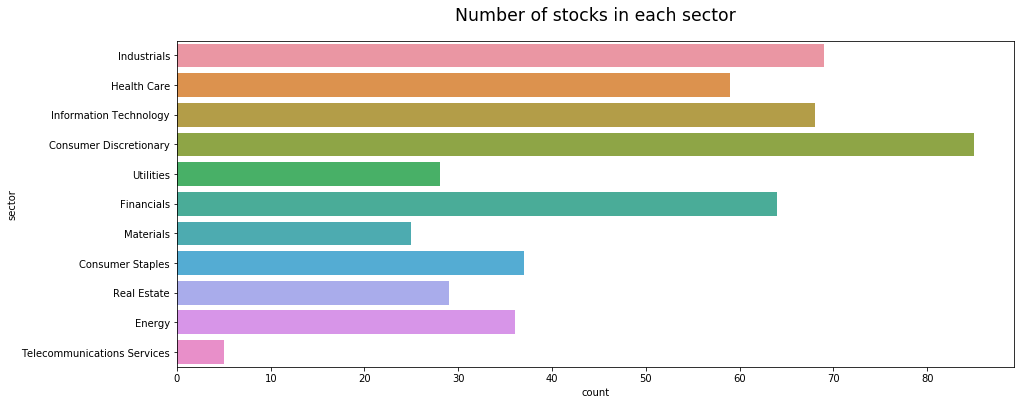

In [36]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(y='sector', data=sec)
plt.title('Number of stocks in each sector',fontsize='xx-large',pad=20)
plt.xticks()

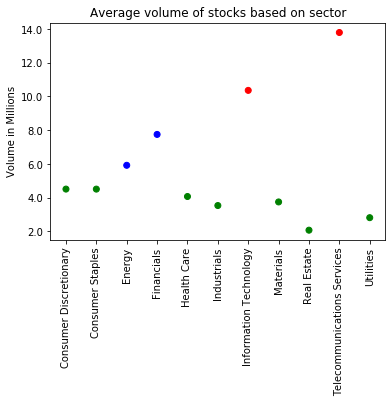

In [113]:
# from matplotlib.ticker import FormatStrFormatter

import matplotlib.ticker as ticker
def numfmt(x, pos): # your custom formatter function: divide by 100.0
    s = '{}'.format(x / 1000000.0)
    return s
yfmt = ticker.FuncFormatter(numfmt) 

from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
adj_price.head()
avg_volume=adj_price.groupby(by='sector').mean()
avg_volume.reset_index(inplace=True)
avg_volume
plt.scatter(avg_volume.sector,avg_volume.volume,color=['green','green','blue','blue','green','green','red','green','green','red','green'])
plt.xticks( rotation='vertical')
plt.title('Average volume of stocks based on sector')
plt.ylabel('Volume in Millions')
ax.yaxis.set_major_formatter(yfmt)

plt.show()
# Axes.ticklabel_format(self, axis='both', style='', scilimits=None, useOffset=None, useLocale=None, useMathText=None)
# plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)


In [50]:
adj_price.head()

,date,year,month,day,symbol,open,close,change,per_chg,low,high,volume,sector,sub_sector,Security
0,2016-01-05,2016,1,5,WLTW,123.43,125.84,positive,1.95,122.31,126.25,2163600.00,Financials,Insurance Brokers,Willis Towers Watson
1,2016-01-06,2016,1,6,WLTW,125.24,119.98,negative,-4.20,119.94,125.54,2386400.00,Financials,Insurance Brokers,Willis Towers Watson
2,2016-01-07,2016,1,7,WLTW,116.38,114.95,negative,-1.23,114.93,119.74,2489500.00,Financials,Insurance Brokers,Willis Towers Watson
3,2016-01-08,2016,1,8,WLTW,115.48,116.62,positive,0.99,113.50,117.44,2006300.00,Financials,Insurance Brokers,Willis Towers Watson
4,2016-01-11,2016,1,11,WLTW,117.01,114.97,negative,-1.74,114.09,117.33,1408600.00,Financials,Insurance Brokers,Willis Towers Watson


In [114]:
sec_sector=sec.groupby(by='sector').count()
sec_sector.reset_index(inplace=True)
sec_sector

,sector,symbol,Security,SEC filings,sub_sector,Address of Headquarters,Date first added,CIK
0,Consumer Discretionary,85,85,85,85,85,61,85
1,Consumer Staples,37,37,37,37,37,20,37
2,Energy,36,36,36,36,36,21,36
3,Financials,64,64,64,64,64,31,64
4,Health Care,59,59,59,59,59,37,59
5,Industrials,69,69,69,69,69,46,69
6,Information Technology,68,68,68,68,68,43,68
7,Materials,25,25,25,25,25,17,25
8,Real Estate,29,29,29,29,29,19,29
9,Telecommunications Services,5,5,5,5,5,3,5


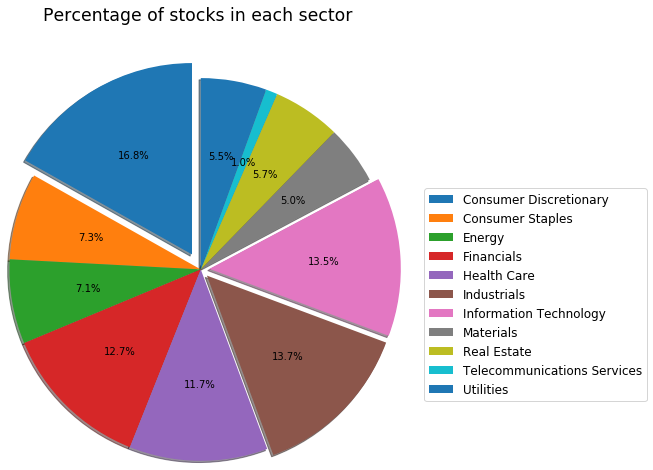

In [115]:
fig4, ax4 = plt.subplots()
labels=sec_sector.sector
explode = (0.2, 0, 0, 0,0, 0.1, 0.1, 0,0, 0, 0)  
ax4.pie(sec_sector.symbol, explode=explode,autopct='%1.1f%%',shadow=True, startangle=90,radius=2.2)
plt.title('Percentage of stocks in each sector ',pad=140,fontsize='xx-large')
plt.legend(labels=labels,bbox_to_anchor=(1.5, 0.9), bbox_transform=ax4.transAxes,fontsize='large')
plt.show()

In [116]:
sector_pivot = pd.pivot_table(adj_price, values = 'close', index = ['date'],columns = ['sector']).reset_index()
sector_pivot.head()

sector,date,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunications Services,Utilities
0,2010-01-04,34.69,34.46,47.02,36.70,44.51,39.99,39.60,45.85,43.03,25.71,34.46
1,2010-01-05,35.00,34.47,47.48,37.04,44.32,40.06,39.55,45.84,43.14,25.82,34.10
2,2010-01-06,34.89,34.50,48.02,37.02,44.41,40.17,39.26,46.33,43.02,24.93,34.26
3,2010-01-07,35.14,34.48,47.86,37.59,44.64,40.47,38.95,46.18,43.23,24.78,34.11
4,2010-01-08,35.26,34.33,48.33,37.57,44.68,40.96,39.24,46.41,42.89,24.56,34.08


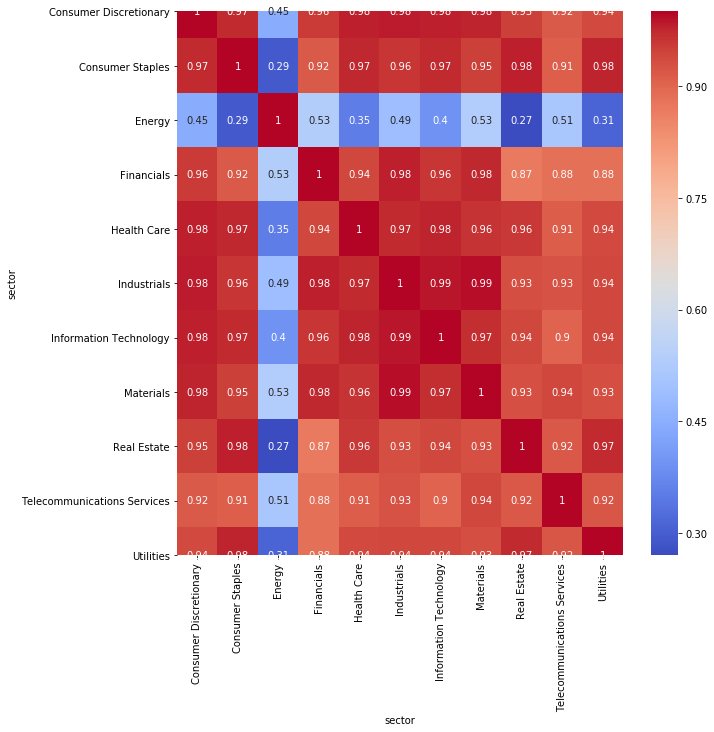

In [117]:
#### can be used to create a portfolio
plt.figure(figsize = (10,10))
sns.heatmap(sector_pivot.corr(),annot=True, cmap="coolwarm")

In [64]:
min_d=adj_price.groupby('symbol').min() ### gets start_date for each stock(date from when we have data of particular stock)
max_d=adj_price.groupby('symbol').max()  ### gets  end_date for each stock(date till when we have data of particular stock)
min_d = min_d.rename(columns = {'date' : 'start_date'})
max_d = max_d.rename(columns = {'date' : 'end_date'})

In [65]:
min_d=min_d.reset_index()
max_d=max_d.reset_index()

In [66]:
adj_price  = adj_price.merge(min_d[['symbol','start_date']], on = 'symbol') # adding start date of each stock
adj_price  = adj_price.merge(max_d[['symbol','end_date']], on = 'symbol') # adding end date of each stock

In [67]:
adj_price.shape

(851264, 17)

In [68]:
### creates a column which shows how many years of data is available for a particular stock
adj_price.insert(17,'data_years',(pd.DatetimeIndex(adj_price['end_date']).year.astype(np.int64))-(pd.DatetimeIndex(adj_price['start_date']).year.astype(np.int64)))

In [69]:
# adj_price['days'].str.replace('days','',inplace=True)
adj_price[adj_price.symbol=='AAP']

,date,year,month,day,symbol,open,close,change,per_chg,low,high,volume,sector,sub_sector,Security,start_date,end_date,data_years
3775,2010-01-04,2010,1,4,AAP,40.70,40.38,negative,-0.79,40.36,41.04,1701700.00,Consumer Discretionary,Automotive Retail,Advance Auto Parts,2010-01-04,2016-12-30,6
3776,2010-01-05,2010,1,5,AAP,40.30,40.14,negative,-0.40,39.72,40.31,1932400.00,Consumer Discretionary,Automotive Retail,Advance Auto Parts,2010-01-04,2016-12-30,6
3777,2010-01-06,2010,1,6,AAP,40.05,40.49,positive,1.10,40.05,40.78,1406200.00,Consumer Discretionary,Automotive Retail,Advance Auto Parts,2010-01-04,2016-12-30,6
3778,2010-01-07,2010,1,7,AAP,39.55,40.48,positive,2.35,39.55,40.54,1256800.00,Consumer Discretionary,Automotive Retail,Advance Auto Parts,2010-01-04,2016-12-30,6
3779,2010-01-08,2010,1,8,AAP,40.25,40.64,positive,0.97,40.11,40.82,960300.00,Consumer Discretionary,Automotive Retail,Advance Auto Parts,2010-01-04,2016-12-30,6
3780,2010-01-11,2010,1,11,AAP,40.72,40.24,negative,-1.18,40.09,40.80,1038400.00,Consumer Discretionary,Automotive Retail,Advance Auto Parts,2010-01-04,2016-12-30,6
3781,2010-01-12,2010,1,12,AAP,39.43,39.54,positive,0.28,38.82,39.72,1910800.00,Consumer Discretionary,Automotive Retail,Advance Auto Parts,2010-01-04,2016-12-30,6
3782,2010-01-13,2010,1,13,AAP,39.50,40.09,positive,1.49,39.41,40.15,810000.00,Consumer Discretionary,Automotive Retail,Advance Auto Parts,2010-01-04,2016-12-30,6
3783,2010-01-14,2010,1,14,AAP,39.94,39.56,negative,-0.95,39.25,39.94,1157600.00,Consumer Discretionary,Automotive Retail,Advance Auto Parts,2010-01-04,2016-12-30,6
3784,2010-01-15,2010,1,15,AAP,39.34,39.31,negative,-0.08,39.17,39.66,738900.00,Consumer Discretionary,Automotive Retail,Advance Auto Parts,2010-01-04,2016-12-30,6


In [70]:
#### this part of the code calculates the total percenatge change of each stock (from start_date to end_date)
initial_open=adj_price[['symbol','open','start_date','Security','sector','sub_sector']][(adj_price.date==adj_price.start_date)]
initial_open = initial_open.rename(columns = {'open' : 'initial_open'})
final_open=adj_price[['symbol','open','end_date']][(adj_price.date==adj_price.end_date)]
final_open = final_open.rename(columns = {'open' : 'final_open'})                                        
per_chg= initial_open.merge(final_open, on = 'symbol')
per_chg.insert(5, 'total_per_chg',((per_chg.final_open)-(per_chg.initial_open))/per_chg.initial_open*100)
per_chg.head()

,symbol,initial_open,start_date,Security,sector,total_per_chg,sub_sector,final_open,end_date
0,WLTW,123.43,2016-01-05,Willis Towers Watson,Financials,-0.68,Insurance Brokers,122.59,2016-12-30
1,A,22.45,2010-01-04,Agilent Technologies Inc,Health Care,103.83,Health Care Equipment,45.76,2016-12-30
2,AAL,4.84,2010-01-04,American Airlines Group,Industrials,879.75,Airlines,47.42,2016-12-30
3,AAP,40.70,2010-01-04,Advance Auto Parts,Consumer Discretionary,320.93,Automotive Retail,171.32,2016-12-30
4,AAPL,30.49,2010-01-04,Apple Inc.,Information Technology,282.58,Computer Hardware,116.65,2016-12-30


In [71]:
## Claucalating the best/worst 10 stocks over the years on the basis of total percenatge change
best_10=per_chg.sort_values(by='total_per_chg' ,ascending=False).head(10)
worst_10=per_chg.sort_values(by='total_per_chg' ).head(10)
worst_10

,symbol,initial_open,start_date,Security,sector,total_per_chg,sub_sector,final_open,end_date
362,RIG,84.48,2010-01-04,Transocean,Energy,-82.52,Oil & Gas Drilling,14.77,2016-12-30
394,SWN,49.69,2010-01-04,Southwestern Energy,Energy,-78.47,Oil & Gas Exploration & Production,10.70,2016-12-30
180,FSLR,136.00,2010-01-04,First Solar Inc,Information Technology,-76.03,Semiconductors,32.60,2016-12-30
83,CHK,25.95,2010-01-04,Chesapeake Energy,Energy,-72.45,Integrated Oil & Gas,7.15,2016-12-30
165,FCX,41.31,2010-01-04,Freeport-McMoran Cp & Gld,Materials,-67.13,Copper,13.58,2016-12-30
385,SPLS,24.62,2010-01-04,Staples Inc.,Consumer Discretionary,-62.67,Specialty Stores,9.19,2016-12-30
182,FTR,7.89,2010-01-04,Frontier Communications,Telecommunications Services,-57.16,Integrated Telecommunications Services,3.38,2016-12-30
291,MOS,60.45,2010-01-04,The Mosaic Company,Materials,-51.38,Fertilizers & Agricultural Chemicals,29.39,2016-12-30
311,NRG,23.78,2010-01-04,NRG Energy,Utilities,-47.65,Independent Power Producers & Energy Traders,12.45,2016-12-30
476,KMI,35.82,2013-01-02,Kinder Morgan,Energy,-42.18,Oil & Gas Refining & Marketing & Transportation,20.71,2016-12-30


In [72]:
best_10_sector=best_10.groupby(by='sector').count()
worst_10_sector=worst_10.groupby(by='sector').count()
worst_10_sector.reset_index(inplace=True)
best_10_sector.reset_index(inplace=True)

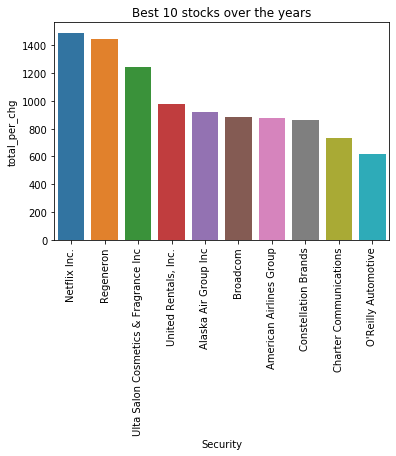

In [73]:
### BEST 10 STOCKS
g=sns.barplot(best_10.Security,best_10.total_per_chg)
g.set_xticklabels(labels=best_10.Security,rotation=90)
plt.title('Best 10 stocks over the years')
plt.show()

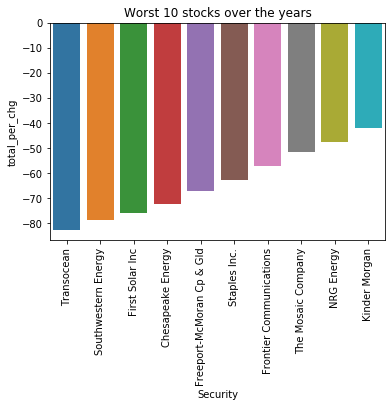

In [74]:
### WORST 10 STOCKS
m=sns.barplot(worst_10.Security,worst_10.total_per_chg)
m.set_xticklabels(labels=worst_10.Security,rotation=90)
plt.title('Worst 10 stocks over the years')
plt.show()

In [75]:
best_30=per_chg.sort_values(by='total_per_chg' ,ascending=False).head(30)
worst_30=per_chg.sort_values(by='total_per_chg' ).head(30)
best_30_sector=best_30.groupby(by='sector').count()
worst_30_sector=worst_30.groupby(by='sector').count()
worst_30_sector.reset_index(inplace=True)
best_30_sector.reset_index(inplace=True)

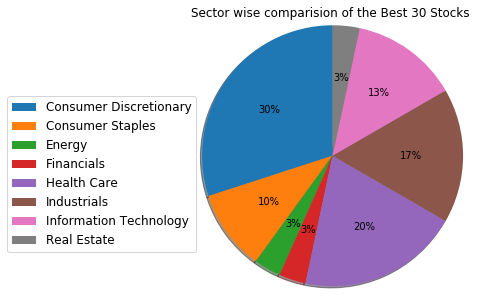

In [76]:
## Best 30 stocks sector wise percentage
fig2, ax2 = plt.subplots()
ax2.pie(best_30_sector.symbol,autopct='%1.0f%%',shadow=True, labeldistance=1,startangle=90,radius=1.5)
labels=best_30_sector.sector

plt.title('Sector wise comparision of the Best 30 Stocks ',pad=30,fontsize ='large')

plt.legend(labels=labels,loc='upper right', bbox_to_anchor=(-0.1,0.8),fontsize ='large')
#plt.pie(sizes, labels=labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.show()


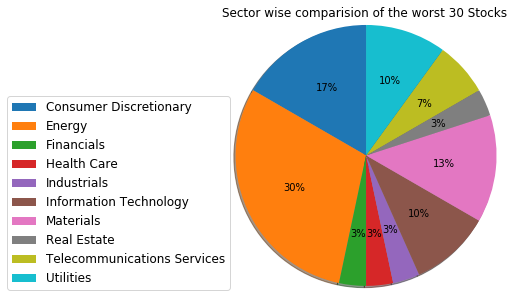

In [77]:
## Worst 30 stocks sector wise percentage
fig2, ax2 = plt.subplots()
ax2.pie(worst_30_sector.symbol,autopct='%1.0f%%',shadow=True, labeldistance=1,startangle=90,radius=1.5)
labels=worst_30_sector.sector

plt.title('Sector wise comparision of the worst 30 Stocks ',pad=30,fontsize ='large')

plt.legend(labels=labels,loc='upper right', bbox_to_anchor=(-0.1,0.8),fontsize ='large')
#plt.pie(sizes, labels=labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.show()

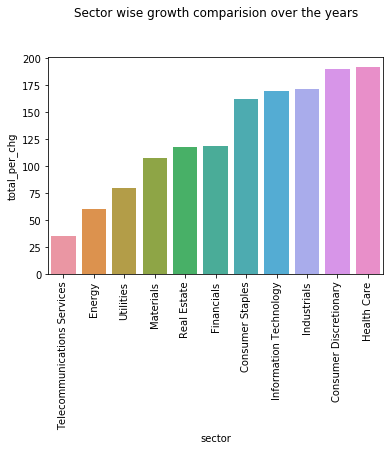

In [78]:
sector_per_chg=per_chg.groupby(by='sector').mean().sort_values(by='total_per_chg')
sector_per_chg.reset_index(inplace=True)
g=sns.barplot(sector_per_chg.sector,sector_per_chg.total_per_chg)
g.set_xticklabels(labels=sector_per_chg.sector,rotation=90)
plt.title('Sector wise growth comparision over the years',pad=40)
plt.show()

In [79]:
### average volume by stock
avg_vol=adj_price.groupby(by='symbol').mean().sort_values(by='volume',ascending=False)
avg_vol.reset_index(inplace=True)
pd.options.display.float_format = '{:.2f}'.format

avg_vol= avg_vol.merge(sec[['symbol','sector','sub_sector','Security']], on = 'symbol')
avg_vol=avg_vol[['symbol','volume','sector','sub_sector','Security']].head(20)
avg_vol

,symbol,volume,sector,sub_sector,Security
0,BAC,142386970.49,Financials,Banks,Bank of America Corp
1,AAPL,94225775.88,Information Technology,Computer Hardware,Apple Inc.
2,F,49352281.27,Consumer Discretionary,Automobile Manufacturers,Ford Motor
3,GE,48551661.01,Industrials,Industrial Conglomerates,General Electric
4,MSFT,45797836.66,Information Technology,Systems Software,Microsoft Corp.
5,INTC,42045504.43,Information Technology,Semiconductors,Intel Corp.
6,CSCO,41986129.68,Information Technology,Networking Equipment,Cisco Systems
7,FB,40007883.83,Information Technology,Internet Software & Services,Facebook
8,PFE,37193773.84,Health Care,Pharmaceuticals,Pfizer Inc.
9,HPQ,35795878.21,Information Technology,Computer Hardware,HP Inc.


In [67]:
!pip install plotly

In [118]:
import plotly.express as px
iris = avg_vol
fig = px.scatter_3d(iris, x=avg_vol.symbol, y=avg_vol.volume, z=avg_vol.sector,color=avg_vol.sector)
fig.show()

In [ ]:
adj_price.head()

In [81]:
adj_price.sort_values(by='per_chg',ascending=False).head(10) #top 10 stocks with highest +ve % change in a single day
adj_price.sort_values(by='per_chg').head(10) #top 10 stocks with highest -ve % change in a single day
#adj_price[(adj_price.symbol=='FSLR')&(adj_price.date=='2013-04-09')]


,date,year,month,day,symbol,open,close,change,per_chg,low,high,volume,sector,sub_sector,Security,start_date,end_date,data_years
316106,2011-10-25,2011,10,25,FSLR,58.11,43.27,negative,-25.54,42.50,58.61,23572600.00,Information Technology,Semiconductors,First Solar Inc,2010-01-04,2016-12-30,6
792923,2016-02-08,2016,2,8,WMB,14.93,11.16,negative,-25.25,10.22,15.00,62368000.00,Energy,Oil & Gas Exploration & Production,Williams Cos.,2010-01-04,2016-12-30,6
834740,2015-05-27,2015,5,27,KORS,60.59,45.93,negative,-24.20,45.88,60.59,69237400.00,Consumer Discretionary,"Apparel, Accessories & Luxury Goods",Michael Kors Holdings,2013-01-02,2016-12-30,3
146269,2016-02-08,2016,2,8,CHK,2.56,2.04,negative,-20.31,1.50,2.59,121984600.00,Energy,Integrated Oil & Gas,Chesapeake Energy,2010-01-04,2016-12-30,6
290734,2016-01-11,2016,1,11,FCX,5.40,4.31,negative,-20.19,4.23,5.42,117668200.00,Materials,Copper,Freeport-McMoran Cp & Gld,2010-01-04,2016-12-30,6
259062,2016-03-15,2016,3,15,ENDP,40.72,32.57,negative,-20.01,32.48,40.98,17422000.00,Health Care,Pharmaceuticals,Endo International,2010-01-04,2016-12-30,6
259225,2016-11-03,2016,11,3,ENDP,18.24,14.63,negative,-19.79,14.39,18.51,20578100.00,Health Care,Pharmaceuticals,Endo International,2010-01-04,2016-12-30,6
538370,2012-10-24,2012,10,24,NFX,33.86,27.46,negative,-18.90,26.97,34.14,21434200.00,Energy,Oil & Gas Exploration & Production,Newfield Exploration Co,2010-01-04,2016-12-30,6
438759,2016-02-04,2016,2,4,KSS,51.13,41.52,negative,-18.80,40.95,51.13,22573600.00,Consumer Discretionary,General Merchandise Stores,Kohl's Corp.,2010-01-04,2016-12-30,6
618408,2015-10-16,2015,10,16,PWR,23.06,18.74,negative,-18.73,18.51,23.06,24408600.00,Industrials,Industrial Conglomerates,Quanta Services Inc.,2010-01-04,2016-12-30,6


In [82]:
### ****************IGNORE THIS****************************

# Best 10 stocks

NFLX=adj_price[adj_price.symbol=='NFLX']
REGN=adj_price[adj_price.symbol=='REGN']
ULTA=adj_price[adj_price.symbol=='ULTA']
URI=adj_price[adj_price.symbol=='URI']
AVGO=adj_price[adj_price.symbol=='AVGO']
AAL=adj_price[adj_price.symbol=='AAL']
STZ=adj_price[adj_price.symbol=='STZ']
ALK=adj_price[adj_price.symbol=='ALK']
CHTR=adj_price[adj_price.symbol=='CHTR']
ORLY=adj_price[adj_price.symbol=='ORLY']

    

In [103]:
NFLX.head()
# NFLX['date']

,date,year,month,day,symbol,open,close,change,per_chg,low,high,volume,sector,sub_sector,Security,start_date,end_date,data_years
535899,2010-01-04,2010,1,4,NFLX,7.93,7.64,negative,-3.67,7.57,7.96,17239600.00,Information Technology,Internet Software & Services,Netflix Inc.,2010-01-04,2016-12-30,6
535900,2010-01-05,2010,1,5,NFLX,7.65,7.36,negative,-3.85,7.26,7.66,23753100.00,Information Technology,Internet Software & Services,Netflix Inc.,2010-01-04,2016-12-30,6
535901,2010-01-06,2010,1,6,NFLX,7.36,7.62,positive,3.47,7.20,7.67,23290400.00,Information Technology,Internet Software & Services,Netflix Inc.,2010-01-04,2016-12-30,6
535902,2010-01-07,2010,1,7,NFLX,7.73,7.49,negative,-3.18,7.46,7.76,9955400.00,Information Technology,Internet Software & Services,Netflix Inc.,2010-01-04,2016-12-30,6
535903,2010-01-08,2010,1,8,NFLX,7.50,7.61,positive,1.54,7.47,7.74,8180900.00,Information Technology,Internet Software & Services,Netflix Inc.,2010-01-04,2016-12-30,6


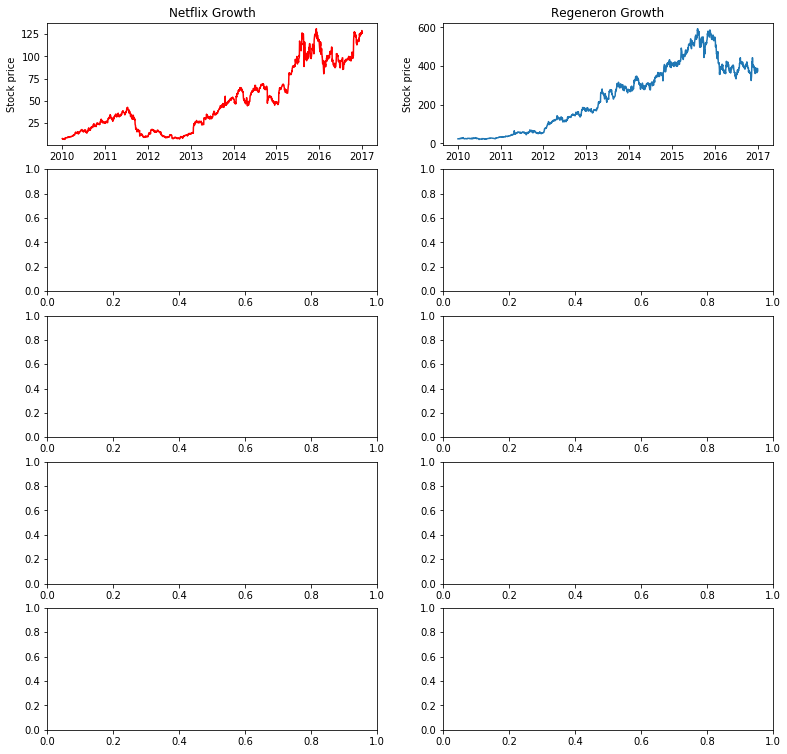

In [96]:
fig, ax = plt.subplots(5,2,figsize=(13,13))
ax[0, 0].plot(NFLX.date,NFLX.open,color='red') 
ax[0,0].title.set_text('Netflix Growth')
ax[0,0].set_ylabel('Stock price')
ax[0, 1].plot(REGN.date,REGN.open) 
ax[0,1].title.set_text('Regeneron Growth')
ax[0,1].set_ylabel('Stock price')
# ax[1, 0].plot(ULTA.date,ULTA.open) 
# ax[1,0].title.set_text('Ulta salon cosmetics Growth')
plt.show()